<a href="https://colab.research.google.com/github/ritzi12/Python-Projects/blob/main/PredictGeneticDisorder_HackerEarth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **AUTHOR** : RITIKA GUPTA <br>
> **Hackerearth Profile**: http://www.hackerearth.com/@ritika.gg1112



# **Predict the Genetic Disorders**

## **DATASET**

*   train.csv : 22083 x 45
*   test.csv  : 9465 x 45

The dataset contains various medical information of children.


## **APPROACH**

### EDA & PREPROCESSING

Our train dataset set has lot of missing data on an average each feature has approx 10% of missing values.

Hence we cannot drop those values as lot of train data will not be used then .In order to overcome this I have tried to impute missing values based on following:

**NUMERIC**: The numeric variables imputed based on average or mean value.

**CATEGORICAL**: The missing values were given common class.ALso we encoded the categorical variables into numeric values using follwoing encoding scheme : 

"NA":0, "No":1 , "Yes":2

and similar type of scheme is followed for ordinal variables.



### MODEL
We need to predict two target variables in this task 
*   Genetic Disorder
*   Disorder Subclass

Each Genetic Disorder has further 3 Disorder Subclass associated with them. Each targer variable has multiple classes.
Such classification tasks comes under **multiclass multilabel classification** where one observation needs to be assigned multiple response variable at a time.

Multilabel Classication can be solved using 3 approaches:
1.   Problem Transformation
2.   Algorithm Adaptation
3.   Ensemble Modeling

I have used Algorithm Adaptation method  which consists of adapting the existing multiclass algorithms so they could be applied to the multilabel problem. The **mlr** package is the only Machine learning framework in R that supports the multilabel learning.It provides two multilabel algorigthms
**"randomForestSRC"and "rFerns"** .I have used "randomForestSRC" as rFerns doesn't support probability prediction but response generation which doesn't give accurate results.



## **CONTENTS**


*   List item
*   List item



## LOAD LIBRARIES AND DATA

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [7]:
train_df=read_csv("train.csv",na=c(" ","")) #replace empty cell with NA while reading
str(train_df)

summary(train_df)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `Patient Age` = col_double(),
  `Blood cell count (mcL)` = col_double(),
  `Mother's age` = col_double(),
  `Father's age` = col_double(),
  `Test 1` = col_double(),
  `Test 2` = col_double(),
  `Test 3` = col_double(),
  `Test 4` = col_double(),
  `Test 5` = col_double(),
  `No. of previous abortion` = col_double(),
  `White Blood cell count (thousand per microliter)` = col_double(),
  `Symptom 1` = col_double(),
  `Symptom 2` = col_double(),
  `Symptom 3` = col_double(),
  `Symptom 4` = col_double(),
  `Symptom 5` = col_double()
)
ℹ Use `spec()` for the full column specifications.




spec_tbl_df [22,083 × 45] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Patient Id                                      : chr [1:22083] "PID0x6418" "PID0x25d5" "PID0x4a82" "PID0x4ac8" ...
 $ Patient Age                                     : num [1:22083] 2 4 6 12 11 14 3 3 11 4 ...
 $ Genes in mother's side                          : chr [1:22083] "Yes" "Yes" "Yes" "Yes" ...
 $ Inherited from father                           : chr [1:22083] "No" "Yes" "No" "No" ...
 $ Maternal gene                                   : chr [1:22083] "Yes" "No" "No" "Yes" ...
 $ Paternal gene                                   : chr [1:22083] "No" "No" "No" "No" ...
 $ Blood cell count (mcL)                          : num [1:22083] 4.76 4.91 4.89 4.71 4.72 ...
 $ Patient First Name                              : chr [1:22083] "Richard" "Mike" "Kimberly" "Jeffery" ...
 $ Family Name                                     : chr [1:22083] NA NA NA "Hoelscher" ...
 $ Father's name                                   :

  Patient Id         Patient Age     Genes in mother's side
 Length:22083       Min.   : 0.000   Length:22083          
 Class :character   1st Qu.: 3.000   Class :character      
 Mode  :character   Median : 7.000   Mode  :character      
                    Mean   : 6.974                         
                    3rd Qu.:11.000                         
                    Max.   :14.000                         
                    NA's   :1427                           
 Inherited from father Maternal gene      Paternal gene     
 Length:22083          Length:22083       Length:22083      
 Class :character      Class :character   Class :character  
 Mode  :character      Mode  :character   Mode  :character  
                                                            
                                                            
                                                            
                                                            
 Blood cell count (mcL) Patient 

## EDA AND PREPROCESSING

We perform various exploratory data analysis and clean the data into a usable format .

### DROP UNNECESSARY VARIABLES
Dropping variables which have no bearings on target or response label.

In [9]:
#dropping
drop_var=c("Patient First Name","Family Name","Father's name","Location of Institute","Institute Name","Parental consent","Place of birth")

train_df<- train_df[,!colnames(train_df) %in% drop_var]

str(train_df)

tibble [22,083 × 38] (S3: tbl_df/tbl/data.frame)
 $ Patient Id                                      : chr [1:22083] "PID0x6418" "PID0x25d5" "PID0x4a82" "PID0x4ac8" ...
 $ Patient Age                                     : num [1:22083] 2 4 6 12 11 14 3 3 11 4 ...
 $ Genes in mother's side                          : chr [1:22083] "Yes" "Yes" "Yes" "Yes" ...
 $ Inherited from father                           : chr [1:22083] "No" "Yes" "No" "No" ...
 $ Maternal gene                                   : chr [1:22083] "Yes" "No" "No" "Yes" ...
 $ Paternal gene                                   : chr [1:22083] "No" "No" "No" "No" ...
 $ Blood cell count (mcL)                          : num [1:22083] 4.76 4.91 4.89 4.71 4.72 ...
 $ Mother's age                                    : num [1:22083] NA NA 41 21 32 NA NA 40 45 44 ...
 $ Father's age                                    : num [1:22083] NA 23 22 NA NA NA 63 NA 44 42 ...
 $ Status                                          : chr [1:22083] "

### MISSING VALUES

We find percentage of missing values in each column for the total data set.We observe on an average column has around ~ 9-10% of missing data.

3 ways missing variables can be handled :
1)Remove Observations
2)Impute/Replace
3)Predict

I impute the variables by taking average of remaining observations.

In [10]:
missing=lapply(lapply(train_df,is.na),mean)
missing



$`Patient Id`
[1] 0

$`Patient Age`
[1] 0.06461984

$`Genes in mother's side`
[1] 0

$`Inherited from father`
[1] 0.01385681

$`Maternal gene`
[1] 0.1272472

$`Paternal gene`
[1] 0

$`Blood cell count (mcL)`
[1] 0

$`Mother's age`
[1] 0.2733324

$`Father's age`
[1] 0.2710682

$Status
[1] 0

$`Respiratory Rate (breaths/min)`
[1] 0.09731468

$`Heart Rate (rates/min`
[1] 0.09568446

$`Test 1`
[1] 0.09631843

$`Test 2`
[1] 0.09745053

$`Test 3`
[1] 0.09722411

$`Test 4`
[1] 0.09690712

$`Test 5`
[1] 0.09826563

$`Follow-up`
[1] 0.0980845

$Gender
[1] 0.09840149

$`Birth asphyxia`
[1] 0.09686184

$`Autopsy shows birth defect (if applicable)`
[1] 0.04646108

$`Folic acid details (peri-conceptional)`
[1] 0.0958656

$`H/O serious maternal illness`
[1] 0.09745053

$`H/O radiation exposure (x-ray)`
[1] 0.09749581

$`H/O substance abuse`
[1] 0.09939773

$`Assisted conception IVF/ART`
[1] 0.09609202

$`History of anomalies in previous pregnancies`
[1] 0.0983562

$`No. of previous abortion`
[1] 0.09790336

$`Birth defects`
[1] 0.09754109

$`White Blood cell count (thousand per microliter)`
[1] 0.09726939

$`Blood test result`
[1] 0.09713354

$`Symptom 1`
[1] 0.09758638

$`Symptom 2`
[1] 0.1006204

$`Symptom 3`
[1] 0.09514106

$`Symptom 4`
[1] 0.09568446

$`Symptom 5`
[1] 0.09749581

$`Genetic Disorder`
[1] 0.09717883

$`Disorder Subclass`
[1] 0.09817507

In [ ]:
str(train_df )

####  NUMERIC VARIABLES

Encoding NA values as 0


In [11]:
mean_pat_age=mean(train_df$`Patient Age`,na.rm = T)
mean_pat_age

mean_moth_age=mean(train_df$`Mother's age`, na.rm = T)
mean_moth_age

mean_fath_age=mean(train_df$`Father's age`, na.rm = T)
mean_fath_age

train_df[is.na(train_df$`Patient Age`),'Patient Age']=7
train_df[is.na(train_df$`Mother's age`),"Mother's age"]=35
train_df[is.na(train_df$`Father's age`),"Father's age"]=42



[1] 6.974148

[1] 34.52645

[1] 41.97285

In [17]:
mean_prev_abort=mean(train_df$`No. of previous abortion`,na.rm = T)
mean_prev_abort
train_df[is.na(train_df$`No. of previous abortion`),"No. of previous abortion"]=2
sum(is.na(train_df$`No. of previous abortion`))

[1] 2.002762

[1] 0

In [15]:
mean_wbc=mean(train_df$`White Blood cell count (thousand per microliter)`,na.rm=T)
train_df[is.na(train_df$`White Blood cell count (thousand per microliter)`),"White Blood cell count (thousand per microliter)"]=round(mean_wbc,2)

In [16]:
ind=which(colnames(train_df) %in% c("Symptom 1","Symptom 2","Symptom 3","Symptom 4","Symptom 5"))
ind
for(i in ind){
  train_df[is.na(train_df[,i]),i]=0

}

[1] 28 29 30 31 32

Out of these 5 numeric variables only Test 4 columns has values as Yes rest all columns have value as no for all observations hence, they wont contribute much as a feature variable thus, dropping them .

In [12]:
#dropping numeric 
drop_var=c("Test 1","Test 2","Test 3","Test 5")

train_df<- train_df[,!colnames(train_df) %in% drop_var]

str(train_df)

tibble [22,083 × 34] (S3: tbl_df/tbl/data.frame)
 $ Patient Id                                      : chr [1:22083] "PID0x6418" "PID0x25d5" "PID0x4a82" "PID0x4ac8" ...
 $ Patient Age                                     : num [1:22083] 2 4 6 12 11 14 3 3 11 4 ...
 $ Genes in mother's side                          : chr [1:22083] "Yes" "Yes" "Yes" "Yes" ...
 $ Inherited from father                           : chr [1:22083] "No" "Yes" "No" "No" ...
 $ Maternal gene                                   : chr [1:22083] "Yes" "No" "No" "Yes" ...
 $ Paternal gene                                   : chr [1:22083] "No" "No" "No" "No" ...
 $ Blood cell count (mcL)                          : num [1:22083] 4.76 4.91 4.89 4.71 4.72 ...
 $ Mother's age                                    : num [1:22083] 35 35 41 21 32 35 35 40 45 44 ...
 $ Father's age                                    : num [1:22083] 42 23 22 42 42 42 63 42 44 42 ...
 $ Status                                          : chr [1:22083] "

In [13]:
train_df[is.na(train_df$`Test 4`),"Test 4"]=0

sum(is.na(train_df$`Test 4`))


[1] 0

#### CATEGORICAL VARIABLES

In [20]:
#Converting character columns to factor
char_var=which(sapply(train_df,is.character))
char_var=char_var[-1]
train_df[,char_var]=lapply(train_df[,char_var], as.factor)



In [21]:
#SUBSTITUTING NA

train_df[is.na(train_df$`Respiratory Rate (breaths/min)`),"Respiratory Rate (breaths/min)"]='Normal (30-60)'
train_df[is.na(train_df$`Heart Rate (rates/min`),"Heart Rate (rates/min"]='Normal'
train_df[is.na(train_df$Gender),"Gender"]='Ambiguous'


In [22]:
#Encode Ordered Categorical Vars
train_df$`Follow-up`=as.numeric(ordered(train_df$`Follow-up`,levels=c("Low","High")))
train_df[is.na(train_df$`Follow-up`),"Follow-up"]=0
train_df$`Follow-up`

[1] 2 2 1 2 1 1 1 1 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 2
   [37] 1 1 0 2 1 1 2 2 1 1 2 1 2 0 2 1 1 1 1 2 1 1 2 1 0 2 1 1 1 2 2 1 1 1 1 2
   [73] 1 1 1 2 1 2 2 1 1 2 1 2 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 2 1 1 0 1 2 2 1 1
  [109] 2 2 2 1 1 1 2 2 2 2 0 1 1 1 2 1 1 0 2 1 1 1 1 2 2 1 2 1 1 1 1 1 0 2 1 2
  [145] 2 0 2 1 1 2 2 1 2 1 2 0 2 1 2 2 2 2 2 0 1 1 2 2 2 2 2 1 0 1 2 1 1 1 1 1
  [181] 2 2 2 1 1 1 1 1 0 0 1 2 1 1 2 0 1 2 1 0 0 2 1 2 0 1 1 0 1 2 1 2 2 2 1 0
  [217] 2 1 1 1 0 1 1 1 2 1 1 2 1 1 2 1 0 2 1 1 1 1 2 2 1 1 2 1 1 2 1 2 1 2 1 1
  [253] 2 1 1 1 0 1 2 2 1 2 1 2 2 2 1 1 2 1 1 1 1 2 0 1 1 2 1 2 2 1 1 1 1 2 0 2
  [289] 0 1 1 1 1 2 1 0 2 2 1 1 0 2 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2
  [325] 2 1 1 1 1 1 1 2 2 1 1 2 2 1 2 2 1 2 2 2 1 2 1 1 1 1 2 1 1 1 2 1 2 1 2 2
  [361] 1 2 1 1 2 1 2 1 2 1 2 2 0 2 2 0 0 1 2 2 0 2 1 2 1 1 0 2 2 2 1 2 2 2 1 2
  [397] 1 1 2 2 1 2 2 1 1 0 1 1 2 2 1 2 2 1 1 2 2 2 1 2 2 1 1 2 2 1 2 1 2 1 1 2
  [433] 2 1 2 2 2 2 2 2 2 1 1 1 2 2 2 1 1 1 0 2 2 2 1 2 1 2 2 2 1 1 1 2 2 2 2 2
  [469] 2 1 2 1 2 2 2 1 1 1 1 1 2 0 2 2 0 1 2 1 1 1 2 1 1 2 2 2 1 2 1 1 2 1 1 2
  [505] 0 2 1 0 1 1 2 1 1 2 0 2 0 2 1 1 2 2 1 2 2 0 1 2 0 1 2 2 0 2 1 1 2 1 2 2
  [541] 2 2 1 2 1 2 0 1 1 0 1 2 2 1 2 1 1 0 1 1 1 0 2 0 1 0 2 1 2 2 0 0 2 1 1 2
  [577] 0 1 1 2 1 2 2 1 2 0 1 1 1 0 1 1 2 2 1 1 1 2 2 0 2 1 1 2 2 2 1 1 1 1 0 1
  [613] 2 1 2 2 1 1 2 1 2 2 1 1 2 2 2 1 1 1 1 1 2 2 1 1 1 0 1 2 1 2 2 2 2 1 2 0
  [649] 2 1 1 2 1 1 2 1 2 1 1 2 2 1 2 1 2 1 1 0 2 2 1 1 2 0 2 2 2 1 1 2 1 2 1 2
  [685] 1 2 2 0 2 1 2 2 1 2 2 1 2 1 2 1 1 0 2 2 1 1 2 2 2 2 0 1 2 2 2 2 1 1 2 2
  [721] 1 1 1 2 2 2 1 2 2 2 1 2 1 0 1 1 1 1 1 1 2 2 2 1 1 0 1 0 2 1 2 1 1 1 2 2
  [757] 1 2 2 1 1 1 2 2 1 2 1 1 0 2 2 1 1 2 0 2 1 2 1 2 2 2 2 1 1 2 1 1 1 2 1 2
  [793] 2 1 0 2 1 1 2 1 1 2 2 2 2 2 2 0 0 1 2 2 2 2 1 2 1 1 2 1 1 1 2 2 2 2 1 1
  [829] 1 2 1 2 2 1 2 2 1 1 0 2 2 2 0 1 2 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1
  [865] 2 1 2 2 1 1 2 1 2 2 1 1 2 0 2 0 2 0 2 1 2 2 2 1 1 2 1 1 1 2 1 2 1 1 1 1
  [901] 1 1 2 2 2 1 2 0 2 2 1 2 1 1 0 2 2 1 2 2 1 1 2 2 2 2 1 2 2 2 1 1 2 2 1 1
  [937] 1 1 0 2 1 2 1 1 1 1 1 1 1 2 1 2 2 0 1 1 1 2 2 2 2 2 0 0 1 2 0 2 2 2 2 2
  [973] 1 2 2 1 1 2 1 1 2 0 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 1 2 1 1 2 1 1 0 0 2 2
 [1009] 2 2 1 2 1 1 2 2 1 2 2 1 2 2 1 0 2 1 1 1 2 1 2 1 2 2 2 2 2 2 0 1 2 1 1 2
 [1045] 1 1 1 1 1 2 1 1 2 1 2 2 0 2 2 1 2 1 1 1 1 1 0 0 2 1 1 2 1 2 0 2 1 2 2 2
 [1081] 0 1 2 1 1 1 2 2 2 1 2 1 1 1 1 2 0 2 1 2 1 1 2 1 2 1 1 2 2 1 1 1 2 2 1 2
 [1117] 2 1 1 1 2 2 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 1 0 1 2 1 2 2 2 2 0 2
 [1153] 2 1 1 2 1 2 1 2 0 1 0 2 1 1 1 2 2 2 2 2 1 1 1 2 0 2 2 1 2 1 1 1 1 1 1 2
 [1189] 2 2 2 0 2 1 1 1 2 2 0 2 1 0 1 2 1 1 1 2 1 1 1 2 2 2 2 1 2 1 1 1 2 2 1 1
 [1225] 0 0 1 1 1 2 1 1 2 1 2 1 2 1 2 2 2 1 1 1 1 1 0 2 1 2 0 2 1 1 1 1 1 2 0 1
 [1261] 1 1 2 1 2 1 2 2 2 1 2 2 1 0 1 2 2 1 0 1 2 1 0 1 1 0 2 2 2 0 1 1 2 1 1 1
 [1297] 1 1 1 0 1 1 2 1 1 2 2 2 2 1 2 1 1 1 1 2 0 1 1 2 1 2 2 2 1 1 1 1 1 1 2 1
 [1333] 1 2 2 1 1 2 2 2 1 2 2 1 1 2 1 0 1 1 1 1 1 2 1 1 1 0 1 2 1 2 2 0 2 1 2 1
 [1369] 2 2 2 1 2 1 1 1 1 2 2 2 2 1 1 1 2 2 1 2 2 1 2 1 1 1 1 2 2 1 1 1 2 1 2 1
 [1405] 1 1 1 2 1 1 1 2 0 2 1 1 2 2 1 2 2 1 1 0 1 2 2 1 2 1 2 2 2 1 2 2 1 2 1 2
 [1441] 1 0 1 2 1 1 1 2 1 1 1 2 2 1 2 0 1 1 1 1 1 2 2 1 2 2 2 1 2 2 2 2 0 0 2 2
 [1477] 2 2 1 1 2 2 0 0 1 1 2 1 1 2 1 2 2 1 2 1 2 2 1 2 2 1 2 2 0 1 2 0 2 2 1 1
 [1513] 2 2 2 1 2 1 1 1 0 2 1 1 1 2 2 0 1 2 0 2 2 1 1 1 2 1 1 2 2 2 2 1 1 2 2 2
 [1549] 1 2 2 1 2 2 2 2 1 1 1 1 1 1 1 2 1 2 2 0 1 0 2 1 2 2 2 1 1 2 1 2 1 1 2 1
 [1585] 2 1 2 1 1 2 2 1 1 0 2 2 1 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 1 1 2 2 2 2 1 2
 [1621] 2 2 2 1 2 2 0 1 1 2 2 2 2 2 2 2 0 2 1 2 2 2 0 2 2 1 1 2 2 1 1 2 2 1 0 1
 [1657] 1 2 1 1 1 2 1 2 1 1 2 0 1 2 1 2 1 1 2 2 2 2 1 0 1 2 2 2 1 2 2 1 1 2 1 2
 [1693] 2 1 1 1 2 1 2 1 2 2 1 1 1 1 2 2 2 1 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 2 1 1
 [1729] 1 1 1 2 2 0 1 2 0 2 2 0 1 1 2 0 2 1 1 2 1 2 0 2 2 2 0 1 2 2 1 1 2 0 1 1
 [1765] 1 2 2 1 0 0 1 1 1 2 1 0 1 1 1 2 1 2 2 2 2 1 1 2 1 1 1 1 0 2 2 2 0 2 2 1
 [18

In [ ]:
birth=as.numeric(ordered(train_df$`Birth asphyxia`,levels=c("No record","Not available","No","Yes")))
birth[birth %in%c(1,2)]=0
birth[birth %in%c(3)]=1
birth[birth %in%c(4)]=2
birth[is.na(birth)]=0

train_df$`Birth asphyxia`=birth

In [ ]:
autopsy=as.numeric(ordered(train_df$`Autopsy shows birth defect (if applicable)`,levels=c("None","Not applicable","No","Yes")))

autopsy[autopsy %in%c(1,2)]=0
autopsy[autopsy %in%c(3)]=1
autopsy[autopsy %in%c(4)]=2
autopsy[is.na(autopsy)]=0

train_df$`Autopsy shows birth defect (if applicable)`=autopsy


In [ ]:
train_df$`H/O serious maternal illness`=as.numeric(ordered(train_df$`H/O serious maternal illness`,levels=c("No","Yes")))
train_df[is.na(train_df$`H/O serious maternal illness`),"H/O serious maternal illness"]=0
train_df$`H/O serious maternal illness`

[1] 0 2 1 2 2 1 2 2 2 1 2 2 1 0 2 0 1 2 1 2 0 2 2 2 2 1 0 1 2 1 2 2 2 1 1 2
   [37] 1 2 1 2 1 2 2 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 0 2 2 2 1 2 1 2 0 1 2 2 2
   [73] 1 2 1 1 0 2 2 2 1 0 1 2 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 2 2 1 1 1 0
  [109] 2 1 2 2 2 1 2 2 1 2 0 2 1 2 1 1 0 0 1 1 1 2 0 1 1 1 0 1 1 0 2 1 1 2 2 1
  [145] 1 2 1 2 2 2 2 1 2 1 2 0 1 1 2 2 0 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 2 2 2 1
  [181] 1 1 1 2 1 0 1 1 0 1 2 1 2 1 2 1 1 1 1 2 2 0 1 1 2 1 2 2 2 0 2 1 1 2 0 0
  [217] 2 1 0 1 1 1 2 2 2 1 1 1 2 2 2 0 0 1 2 2 1 1 0 1 0 2 2 1 1 1 1 2 1 2 0 1
  [253] 2 2 1 1 2 1 2 2 1 2 2 0 2 2 2 1 1 2 0 2 2 1 1 2 2 0 2 2 1 1 1 1 2 1 1 1
  [289] 2 1 1 2 2 2 1 2 2 2 2 0 2 2 1 2 1 2 1 2 1 1 1 2 2 2 1 0 2 2 1 2 1 1 1 1
  [325] 1 2 2 2 1 1 1 2 2 1 2 2 1 2 1 2 2 0 2 1 1 0 2 1 2 0 2 2 1 2 1 1 0 2 2 1
  [361] 2 2 0 2 2 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2 1 2 2 1 2 2 1 2 1 2 0 1 1 1 1 2
  [397] 1 1 2 2 0 1 1 2 2 2 2 2 1 1 2 2 0 1 1 2 2 2 2 2 2 1 1 2 2 2 1 0 2 1 2 1
  [433] 2 2 1 2 1 2 2 1 1 1 1 2 1 2 0 2 2 2 1 2 2 1 2 2 1 2 1 2 1 1 1 1 2 1 2 0
  [469] 2 1 2 2 2 2 1 1 2 2 2 1 0 0 2 2 2 1 2 1 2 1 1 2 0 1 1 0 0 2 1 2 2 1 1 2
  [505] 1 1 2 1 2 0 2 1 1 1 2 1 1 1 1 1 1 2 2 1 1 2 2 0 1 1 0 2 0 2 2 2 1 0 2 0
  [541] 1 1 1 2 2 2 2 1 2 1 1 0 1 1 1 1 1 1 1 2 1 2 2 1 1 2 2 1 2 2 2 0 1 2 1 1
  [577] 1 1 2 1 1 2 2 2 1 1 2 1 1 2 1 1 1 0 2 1 2 0 0 2 2 2 2 2 0 1 1 1 1 0 2 2
  [613] 2 1 2 1 2 1 0 0 2 2 1 2 1 0 1 1 2 2 0 2 2 0 1 2 1 1 2 1 1 1 2 2 1 1 2 1
  [649] 2 2 1 2 2 1 1 1 2 2 2 1 1 1 1 1 1 2 0 1 2 1 1 2 2 2 2 1 2 2 1 1 1 0 2 1
  [685] 0 1 1 1 2 1 1 1 2 2 1 2 2 1 2 1 1 1 2 0 2 2 0 1 1 2 0 1 2 1 1 2 0 2 0 1
  [721] 2 1 1 1 0 1 2 1 1 1 1 0 1 1 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 1 2 2 1 2 1 0
  [757] 2 2 2 2 1 2 1 1 2 1 0 2 1 2 1 1 1 2 2 1 2 2 2 1 2 2 2 1 1 2 0 2 0 0 1 1
  [793] 2 2 1 1 1 2 1 2 2 1 1 2 0 1 1 1 2 1 2 0 1 1 1 2 2 2 2 2 1 0 1 2 1 2 1 1
  [829] 1 1 1 2 2 1 1 2 1 1 0 1 2 1 2 2 2 2 2 2 1 2 1 0 1 1 1 1 2 1 2 2 2 2 1 2
  [865] 1 2 2 1 2 2 1 1 0 1 1 1 2 1 2 1 2 2 0 1 2 2 1 2 1 2 1 2 0 2 1 1 1 2 2 1
  [901] 2 1 0 1 1 1 1 0 1 1 2 0 1 2 2 1 0 2 2 2 1 2 0 1 2 0 2 1 1 1 2 1 1 1 2 1
  [937] 1 1 1 1 1 1 1 2 1 1 2 2 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 0 1 2 2 1 2 0 2 2
  [973] 1 1 1 1 2 1 1 2 2 2 1 2 2 2 0 1 2 2 2 2 2 1 2 2 0 2 1 0 1 2 1 1 0 2 1 1
 [1009] 2 1 2 2 1 2 2 0 2 1 2 2 2 0 2 2 1 1 2 2 2 2 1 2 2 1 1 2 1 2 2 0 1 2 1 2
 [1045] 1 1 2 2 1 2 2 1 1 1 1 0 2 2 2 2 1 1 2 0 2 2 1 2 2 2 1 1 2 2 2 1 0 1 2 0
 [1081] 2 1 1 2 1 1 2 1 2 0 1 1 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 0 2 1
 [1117] 2 1 2 1 1 2 1 2 1 2 1 1 2 2 1 1 0 2 1 2 1 0 2 2 1 1 1 1 2 0 1 2 1 0 2 1
 [1153] 1 0 1 1 1 1 2 2 2 1 1 2 2 1 1 1 2 2 1 1 2 2 1 2 2 1 1 2 2 2 1 1 2 2 1 2
 [1189] 1 0 1 1 2 0 2 2 2 2 1 2 1 2 2 1 0 1 2 1 1 1 2 1 2 1 2 1 1 1 1 2 0 2 2 2
 [1225] 1 2 2 2 1 2 1 1 1 1 0 1 0 2 0 2 1 1 1 2 2 2 1 0 2 2 0 0 1 2 2 2 2 1 1 1
 [1261] 2 0 0 2 2 1 2 2 2 1 0 2 2 0 2 1 0 2 2 2 2 1 1 1 0 0 1 1 1 1 1 1 1 2 2 1
 [1297] 1 0 2 0 1 2 1 0 2 2 2 1 2 2 2 2 1 1 1 0 1 1 2 2 2 1 2 0 2 2 1 1 1 2 2 2
 [1333] 2 1 2 2 1 1 2 2 2 1 1 1 2 2 1 1 1 1 2 1 1 1 2 2 1 2 1 1 1 2 2 2 1 1 2 2
 [1369] 2 0 2 1 1 1 0 1 2 1 2 0 1 2 1 1 2 2 1 2 2 1 2 0 1 2 2 2 1 1 1 1 2 1 2 2
 [1405] 1 1 1 1 1 2 0 1 2 2 1 1 1 2 1 1 1 1 1 2 2 2 2 1 2 2 1 2 1 1 0 1 2 0 2 1
 [1441] 0 2 2 2 1 0 1 2 2 1 2 1 2 0 2 2 2 1 2 2 1 1 1 2 1 2 1 1 1 0 2 2 1 1 1 2
 [1477] 2 1 1 2 2 1 0 2 1 2 2 2 1 2 2 1 0 1 2 2 1 2 2 0 1 0 1 2 1 1 2 1 1 0 1 2
 [1513] 2 2 1 2 1 2 2 2 1 2 2 1 2 1 2 1 2 1 2 0 1 1 2 1 2 2 2 2 1 1 2 2 2 1 1 2
 [1549] 0 2 2 2 1 2 1 1 2 1 1 0 2 0 0 1 2 2 1 2 1 0 2 0 1 1 1 1 0 1 2 2 2 1 1 1
 [1585] 2 1 1 0 2 1 1 1 2 0 1 2 2 2 2 2 1 2 2 0 2 1 1 1 1 1 2 1 1 2 2 1 1 0 2 1
 [1621] 1 1 1 1 2 2 2 1 2 2 0 2 1 2 2 1 0 2 2 1 2 1 0 2 2 2 2 2 2 2 0 1 1 2 2 1
 [1657] 2 2 1 2 1 1 0 1 2 1 1 0 0 1 1 2 2 1 1 1 1 1 1 1 0 1 1 2 2 0 2 2 2 2 2 2
 [1693] 2 1 2 1 2 2 2 2 1 2 0 1 2 0 1 1 2 1 1 1 1 2 2 2 1 1 1 2 2 1 2 2 2 2 2 2
 [1729] 1 2 0 0 1 1 1 1 2 2 2 1 2 1 2 1 1 0 1 2 0 1 1 2 1 2 2 1 2 2 1 2 2 1 1 2
 [1765] 1 2 2 1 1 2 0 1 1 2 0 2 2 1 1 1 2 0 0 1 2 1 2 1 2 2 1 1 1 2 2 2 0 1 1 1
 [18

In [23]:
exposure=as.numeric(ordered(train_df$`H/O radiation exposure (x-ray)`,levels=c("-","Not applicable","No","Yes")))

exposure[exposure %in%c(1,2)]=0
exposure[exposure %in%c(3)]=1
exposure[exposure %in%c(4)]=2
exposure[is.na(exposure)]=0

train_df$`H/O radiation exposure (x-ray)`=exposure

In [24]:
substance=as.numeric(ordered(train_df$`H/O substance abuse`,levels=c("-","Not applicable","No","Yes")))

substance[substance %in%c(1,2)]=0
substance[substance %in%c(3)]=1
substance[substance %in%c(4)]=2
substance[is.na(substance)]=0

train_df$`H/O substance abuse`=substance

In [25]:
defect=as.numeric(ordered(train_df$`Birth defects`,levels=c("Singular","Multiple")))
defect[is.na(defect)]=0

train_df$`Birth defects`=defect

In [26]:
mothgene=as.numeric(ordered(train_df$`Genes in mother's side`,levels=c("No","Yes")))
mothgene[is.na(mothgene)]=0

train_df$`Genes in mother's side`=mothgene

In [27]:
fathgene=as.numeric(ordered(train_df$`Inherited from father`,levels=c("No","Yes")))
fathgene[is.na(fathgene)]=0

train_df$`Inherited from father`=fathgene

In [28]:
matgene=as.numeric(ordered(train_df$`Maternal gene`,levels=c("No","Yes")))
matgene[is.na(matgene)]=0

train_df$`Maternal gene`=matgene

In [29]:
patgene=as.numeric(ordered(train_df$`Paternal gene`,levels=c("No","Yes")))
patgene[is.na(patgene)]=0

train_df$`Paternal gene`=patgene

In [30]:
folic=as.numeric(ordered(train_df$`Folic acid details (peri-conceptional)`,levels=c("No","Yes")))
folic[is.na(folic)]=0

train_df$`Folic acid details (peri-conceptional)`=folic

In [31]:
IVF=as.numeric(ordered(train_df$`Assisted conception IVF/ART`, levels=c("No","Yes")))
IVF[is.na(IVF)]=0

train_df$`Assisted conception IVF/ART` =IVF

In [32]:
  history=as.numeric(ordered(train_df$`History of anomalies in previous pregnancies`, levels=c("No","Yes")))
  history[is.na(history)]=0

  train_df$`History of anomalies in previous pregnancies` =history

In [33]:
#Bloodtest result
blood=as.numeric(ordered(train_df$`Blood test result`,levels=c("inconclusive","normal","slightly abnormal","abnormal")))

blood[blood %in%c(1)]=0
blood[blood %in%c(2)]=1
blood[blood %in%c(3)]=2
blood[blood %in%c(4)]=3
blood[is.na(blood)]=0

train_df$`Blood test result`=blood

In [35]:
str(train_df) #All factor columns replaced as numeric with numeric encoding 
              #based on scheme defined in approach .

tibble [22,083 × 34] (S3: tbl_df/tbl/data.frame)
 $ Patient Id                                      : chr [1:22083] "PID0x6418" "PID0x25d5" "PID0x4a82" "PID0x4ac8" ...
 $ Patient Age                                     : num [1:22083] 2 4 6 12 11 14 3 3 11 4 ...
 $ Genes in mother's side                          : num [1:22083] 2 2 2 2 2 2 2 1 1 1 ...
 $ Inherited from father                           : num [1:22083] 1 2 1 1 1 1 1 1 1 2 ...
 $ Maternal gene                                   : num [1:22083] 2 1 1 2 0 2 2 2 2 2 ...
 $ Paternal gene                                   : num [1:22083] 1 1 1 1 2 1 2 2 1 2 ...
 $ Blood cell count (mcL)                          : num [1:22083] 4.76 4.91 4.89 4.71 4.72 ...
 $ Mother's age                                    : num [1:22083] 35 35 41 21 32 35 35 40 45 44 ...
 $ Father's age                                    : num [1:22083] 42 23 22 42 42 42 63 42 44 42 ...
 $ Status                                          : Factor w/ 2 levels "Al

### DROP MISSING TARGET VARIABLES
We remove rows which have missing target labels.

In [36]:
#Cleaned Train DATA
cleaned_df=train_df[!is.na(train_df$`Genetic Disorder`),]
cleaned_df=cleaned_df[!is.na(cleaned_df$`Disorder Subclass`),]
str(cleaned_df)

tibble [18,047 × 34] (S3: tbl_df/tbl/data.frame)
 $ Patient Id                                      : chr [1:18047] "PID0x6418" "PID0x4a82" "PID0x4ac8" "PID0x1bf7" ...
 $ Patient Age                                     : num [1:18047] 2 6 12 11 14 3 3 11 4 6 ...
 $ Genes in mother's side                          : num [1:18047] 2 2 2 2 2 2 1 1 1 2 ...
 $ Inherited from father                           : num [1:18047] 1 1 1 1 1 1 1 1 2 1 ...
 $ Maternal gene                                   : num [1:18047] 2 1 2 0 2 2 2 2 2 0 ...
 $ Paternal gene                                   : num [1:18047] 1 1 1 2 1 2 2 1 2 1 ...
 $ Blood cell count (mcL)                          : num [1:18047] 4.76 4.89 4.71 4.72 5.1 ...
 $ Mother's age                                    : num [1:18047] 35 41 21 32 35 35 40 45 44 35 ...
 $ Father's age                                    : num [1:18047] 42 22 42 42 42 63 42 44 42 42 ...
 $ Status                                          : Factor w/ 2 levels "Ali

### ONE HOT ENCODING 
Encode certain categorical variables .

In [37]:
#Encode
encode_vars=model.matrix(~Status+`Respiratory Rate (breaths/min)`+`Heart Rate (rates/min`+Gender-1,cleaned_df)
encode_df=as.data.frame(encode_vars)
encode_df

,StatusAlive,StatusDeceased,`Respiratory Rate (breaths/min)`Tachypnea,`Heart Rate (rates/min`Tachycardia,GenderFemale,GenderMale
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0
2,1,0,0,1,0,0
3,0,1,1,0,0,1
4,1,0,1,1,0,1
5,0,1,0,0,1,0
6,1,0,0,0,0,1
7,1,0,1,0,0,0
8,1,0,1,1,0,1
9,1,0,1,1,0,1


### TRANSFORM TARGET VARIABLES
We tranform each class as a seperate column with logical TRUE FALSE values since MLR package algorithms requires labels in this format .

In [38]:
label_gene=model.matrix(~`Genetic Disorder`-1,cleaned_df)
label_gene=as.data.frame(label_gene)
label_gene=sapply(label_gene,as.logical)

label_gene=as_tibble(label_gene)

label_sub=model.matrix(~`Disorder Subclass`-1,cleaned_df)
label_sub=as.data.frame(label_sub)
label_sub=sapply(label_sub,as.logical)

label_sub=as_tibble(label_sub)

In [39]:
cleaned_label=cbind(label_gene,label_sub)

colnames(cleaned_label)[1:3]<-c("Genetic Disorder_MitochondrialGID","Genetic Disorder_MultifactorialGID","Genetic Disorder_SingleGID")

In [40]:
cleaned_df=cbind(cleaned_df,encode_df)
str(cleaned_df)

'data.frame':	18047 obs. of  40 variables:
 $ Patient Id                                      : chr  "PID0x6418" "PID0x4a82" "PID0x4ac8" "PID0x1bf7" ...
 $ Patient Age                                     : num  2 6 12 11 14 3 3 11 4 6 ...
 $ Genes in mother's side                          : num  2 2 2 2 2 2 1 1 1 2 ...
 $ Inherited from father                           : num  1 1 1 1 1 1 1 1 2 1 ...
 $ Maternal gene                                   : num  2 1 2 0 2 2 2 2 2 0 ...
 $ Paternal gene                                   : num  1 1 1 2 1 2 2 1 2 1 ...
 $ Blood cell count (mcL)                          : num  4.76 4.89 4.71 4.72 5.1 ...
 $ Mother's age                                    : num  35 41 21 32 35 35 40 45 44 35 ...
 $ Father's age                                    : num  42 22 42 42 42 63 42 44 42 42 ...
 $ Status                                          : Factor w/ 2 levels "Alive","Deceased": 1 1 2 1 2 1 1 1 1 2 ...
 $ Respiratory Rate (breaths/min)              

In [42]:
#Drop variables whcih are in factor and later on we will cbind with encoded variables of these
drop_var=c("Patient Id","Status","Respiratory Rate (breaths/min)","Heart Rate (rates/min","Gender","Genetic Disorder","Disorder Subclass")

cleaned_df<- cleaned_df[,!colnames(cleaned_df) %in% drop_var]

str(cleaned_df)

'data.frame':	18047 obs. of  33 variables:
 $ Patient Age                                     : num  2 6 12 11 14 3 3 11 4 6 ...
 $ Genes in mother's side                          : num  2 2 2 2 2 2 1 1 1 2 ...
 $ Inherited from father                           : num  1 1 1 1 1 1 1 1 2 1 ...
 $ Maternal gene                                   : num  2 1 2 0 2 2 2 2 2 0 ...
 $ Paternal gene                                   : num  1 1 1 2 1 2 2 1 2 1 ...
 $ Blood cell count (mcL)                          : num  4.76 4.89 4.71 4.72 5.1 ...
 $ Mother's age                                    : num  35 41 21 32 35 35 40 45 44 35 ...
 $ Father's age                                    : num  42 22 42 42 42 63 42 44 42 42 ...
 $ Test 4                                          : num  1 1 1 1 1 1 1 1 1 0 ...
 $ Follow-up                                       : num  2 1 2 1 1 1 1 1 1 1 ...
 $ Birth asphyxia                                  : Factor w/ 4 levels "No","No record",..: NA 2 3 3 3 2 2 4

### SAVE CLEANED DATA
Save cleaned features and labels for further use.

In [43]:
saveRDS(cleaned_df,file="cleaned_df.rds")
saveRDS(cleaned_label,file="cleaned_label.rds")

## MODEL BUILDING

In [44]:
#MODEL
requiredPack=c("mlr","FSelector","splitTools","Metrics")
install.packages(requiredPack)
lapply(requiredPack,FUN=library,character.only=T)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fastmatch’, ‘RWekajars’, ‘rJava’, ‘ParamHelpers’, ‘BBmisc’, ‘checkmate’, ‘parallelMap’, ‘XML’, ‘entropy’, ‘randomForest’, ‘RWeka’


Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.



[[1]]
 [1] "mlr"          "ParamHelpers" "forcats"      "stringr"      "dplyr"       
 [6] "purrr"        "readr"        "tidyr"        "tibble"       "ggplot2"     
[11] "tidyverse"    "stats"        "graphics"     "grDevices"    "utils"       
[16] "datasets"     "methods"      "base"        

[[2]]
 [1] "FSelector"    "mlr"          "ParamHelpers" "forcats"      "stringr"     
 [6] "dplyr"        "purrr"        "readr"        "tidyr"        "tibble"      
[11] "ggplot2"      "tidyverse"    "stats"        "graphics"     "grDevices"   
[16] "utils"        "datasets"     "methods"      "base"        

[[3]]
 [1] "splitTools"   "FSelector"    "mlr"          "ParamHelpers" "forcats"     
 [6] "stringr"      "dplyr"        "purrr"        "readr"        "tidyr"       
[11] "tibble"       "ggplot2"      "tidyverse"    "stats"        "graphics"    
[16] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[4]]
 [1] "Metrics"      "splitTools"   "FSelector"    "mlr"          "ParamHelpers"
 [6] "forcats"      "stringr"      "dplyr"        "purrr"        "readr"       
[11] "tidyr"        "tibble"       "ggplot2"      "tidyverse"    "stats"       
[16] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[21] "base"

In [15]:
search() # check if all the packages loaded in environment 

[1] ".GlobalEnv"           "package:Metrics"      "package:splitTools"  
 [4] "package:FSelector"    "package:mlr"          "package:ParamHelpers"
 [7] "jupyter:irkernel"     "package:stats"        "package:graphics"    
[10] "package:grDevices"    "package:utils"        "package:datasets"    
[13] "package:methods"      "Autoloads"            "package:base"

In [56]:
#Loading cleaned data objects
cleaned_df=readRDS("cleaned_df.rds")
cleaned_label=readRDS("cleaned_label.rds")

In [57]:
cleaned_data=cbind(cleaned_df,cleaned_label)

In [58]:
#Convert columns names into an ideal R variable name format otherwise model algorithms would throw error
column_names=make.names(colnames(cleaned_data))
column_names
colnames(cleaned_data)=column_names


[1] "Patient.Age"                                            
 [2] "Genes.in.mother.s.side"                                 
 [3] "Inherited.from.father"                                  
 [4] "Maternal.gene"                                          
 [5] "Paternal.gene"                                          
 [6] "Blood.cell.count..mcL."                                 
 [7] "Mother.s.age"                                           
 [8] "Father.s.age"                                           
 [9] "Test.4"                                                 
[10] "Follow.up"                                              
[11] "Birth.asphyxia"                                         
[12] "Autopsy.shows.birth.defect..if.applicable."             
[13] "Folic.acid.details..peri.conceptional."                 
[14] "H.O.serious.maternal.illness"                           
[15] "H.O.radiation.exposure..x.ray."                         
[16] "H.O.substance.abuse"                                    
[17] "Assisted.conception.IVF.ART"                            
[18] "History.of.anomalies.in.previous.pregnancies"           
[19] "No..of.previous.abortion"                               
[20] "Birth.defects"                                          
[21] "White.Blood.cell.count..thousand.per.microliter."       
[22] "Blood.test.result"                                      
[23] "Symptom.1"                                              
[24] "Symptom.2"                                              
[25] "Symptom.3"                                              
[26] "Symptom.4"                                              
[27] "Symptom.5"                                              
[28] "StatusAlive"                                            
[29] "StatusDeceased"                                         
[30] "X.Respiratory.Rate..breaths.min..Tachypnea"             
[31] "X.Heart.Rate..rates.min.Tachycardia"                    
[32] "GenderFemale"                                           
[33] "GenderMale"                                             
[34] "Genetic.Disorder_MitochondrialGID"                      
[35] "Genetic.Disorder_MultifactorialGID"                     
[36] "Genetic.Disorder_SingleGID"                             
[37] "X.Disorder.Subclass.Alzheimer.s"                        
[38] "X.Disorder.Subclass.Cancer"                             
[39] "X.Disorder.Subclass.Cystic.fibrosis"                    
[40] "X.Disorder.Subclass.Diabetes"                           
[41] "X.Disorder.Subclass.Hemochromatosis"                    
[42] "X.Disorder.Subclass.Leber.s.hereditary.optic.neuropathy"
[43] "X.Disorder.Subclass.Leigh.syndrome"                     
[44] "X.Disorder.Subclass.Mitochondrial.myopathy"             
[45] "X.Disorder.Subclass.Tay.Sachs"

In [65]:
str(cleaned_data)

'data.frame':	18047 obs. of  21 variables:
 $ Genes.in.mother.s.side                                 : num  2 2 2 2 2 2 1 1 1 2 ...
 $ Inherited.from.father                                  : num  1 1 1 1 1 1 1 1 2 1 ...
 $ Maternal.gene                                          : num  2 1 2 0 2 2 2 2 2 0 ...
 $ Paternal.gene                                          : num  1 1 1 2 1 2 2 1 2 1 ...
 $ Symptom.1                                              : num  1 0 0 0 1 0 0 1 0 1 ...
 $ Symptom.2                                              : num  1 1 0 0 0 0 0 1 0 0 ...
 $ Symptom.3                                              : num  1 1 1 0 0 0 1 1 1 0 ...
 $ Symptom.4                                              : num  1 1 0 0 1 0 0 0 1 0 ...
 $ Symptom.5                                              : num  1 1 0 0 0 0 0 1 1 0 ...
 $ Genetic.Disorder_MitochondrialGID                      : logi  TRUE FALSE TRUE FALSE FALSE FALSE ...
 $ Genetic.Disorder_MultifactorialGID               

### CHECKING FEATURE IMPORTANCE

In [59]:
#Checking Importantance of Features based on information gain 
taskMito= makeClassifTask(id = "Mitochondrial", data=cleaned_data[,-c(35:45)],target = "Genetic.Disorder_MitochondrialGID",positive="TRUE")
taskMulti= makeClassifTask(id = "Multifactorial", data=cleaned_data[,-c(36:45,34)],target = "Genetic.Disorder_MultifactorialGID",positive="TRUE")
taskSingle= makeClassifTask(id = "Single-Gene", data=cleaned_data[,-c(37:45,34,35)],target = "Genetic.Disorder_SingleGID",positive="TRUE")



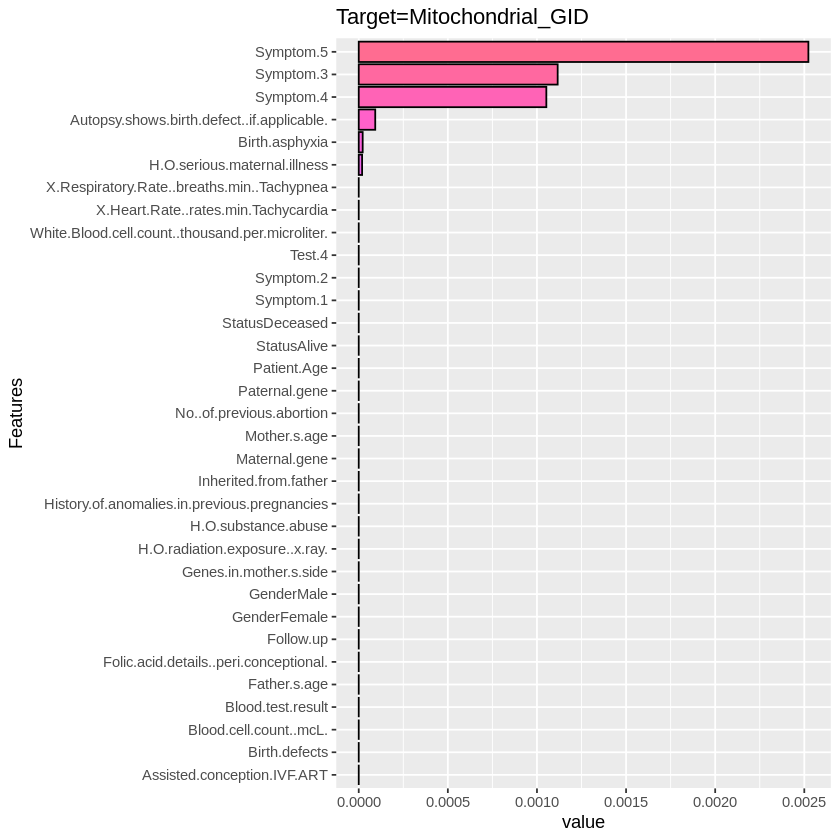

In [61]:
Info=generateFilterValuesData(taskMito,method="information.gain")
Info%>%.$data%>%ggplot(aes(x=reorder(name,value),y=value,fill=reorder(name,value)))+geom_bar(stat="identity",color="black",show.legend=F)+scale_x_discrete("Features")+coord_flip()+ggtitle("Target=Mitochondrial_GID")


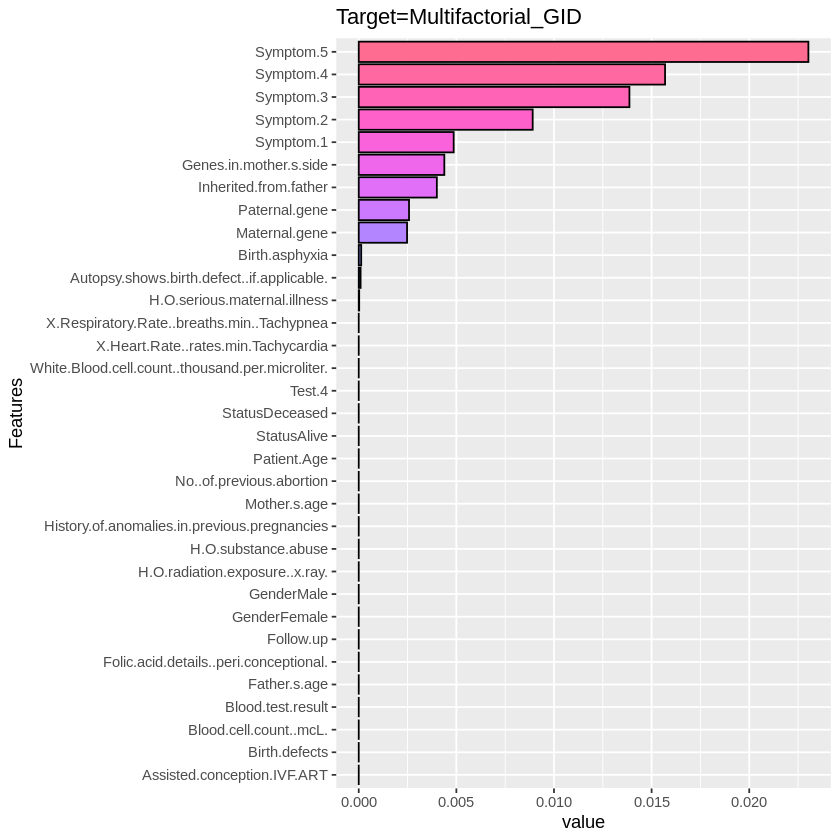

In [63]:
Info=generateFilterValuesData(taskMulti,method="information.gain")
Info%>%.$data%>%ggplot(aes(x=reorder(name,value),y=value,fill=reorder(name,value)))+geom_bar(stat="identity",color="black",show.legend=F)+scale_x_discrete("Features")+coord_flip()+ggtitle("Target=Multifactorial_GID")


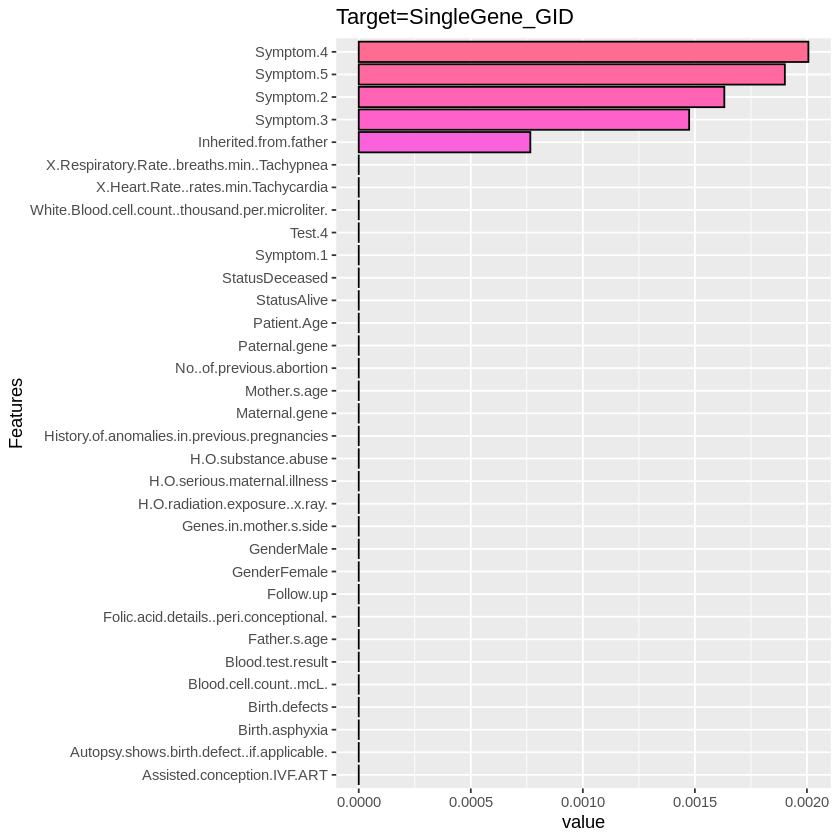

In [34]:
Info=generateFilterValuesData(taskSingle,method="information.gain")
Info%>%.$data%>%ggplot(aes(x=reorder(name,value),y=value,fill=reorder(name,value)))+geom_bar(stat="identity",color="black",show.legend=F)+scale_x_discrete("Features")+coord_flip()+ggtitle("Target=SingleGene_GID")


This is an iterative process at first I built model with all features and then one by one dropped features based on feature importance and checked performance of model. Best results were obtained for these 9 combination of features.

In [64]:
#dropping unnecessary features and keeping only 9 features (Genes mother side, inherited from father , maternal gene,paternal gene and 5 symptom features & 12 target variables)
cleaned_data=cleaned_data[,-c(1,6:22,28:33)]

In [66]:
#Partitioning training data into train and validation set
indx=partition(cleaned_data$Genetic.Disorder_MitochondrialGID,p=c(train=0.75,test=0.25))
test=cleaned_data[indx$test,]
labels=make.names(colnames(cleaned_label))



In [67]:
#Instal randomForestSRC
install.packages("randomForestSRC")
library(randomForestSRC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘downloader’, ‘htmlwidgets’, ‘igraph’, ‘influenceR’, ‘viridis’, ‘visNetwork’, ‘data.tree’, ‘DiagrammeR’



 randomForestSRC 2.12.0 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 



Attaching package: ‘randomForestSRC’


The following objects are masked from ‘package:mlr’:

    impute, subsample


The following object is masked from ‘package:purrr’:

    partial




### MAKE TASK AND LEARNER

We create a multilabelTask and also make a learner with predition type as probability

In [68]:
#Make Task ,Learner 
GID.task = makeMultilabelTask(id = "GID", data=cleaned_data,target=labels)
lrn.rfsrc = makeLearner("multilabel.randomForestSRC",predict.type = "prob")



### TRAIN LEARNER


In [69]:
##Train
mod.rf=mlr::train(lrn.rfsrc,GID.task,subset=indx$train)

### PREDICT ON VALIDATION SET
We see the predictions metrics arent too accurate as threshold probability is 0.5 .Hence we extract maximum probability labels for each observations and assing those labels to the observations

If two labels have same probability we take only first index label.

In [70]:
#Predict on test/validation  set  ,
pred.rf=predict(mod.rf,newdata=test)
measures=list(multilabel.acc,multilabel.f1)

p1=performance(pred.rf,measures)
p1

multilabel.acc  multilabel.f1 
     0.3240597      0.3923372

In [71]:
#Extracting  highest probability and assigning that label to each of two target labels
prob_Disorder_names=colnames(pred.rf$data)[13:15]
prob_Disorder=pred.rf$data[,prob_Disorder_names]

prob_Subclass_names=colnames(pred.rf$data)[16:24]
prob_Subclass=pred.rf$data[,prob_Subclass_names]

pred_df=data.frame("GeneticDisorder"=character(),"Subclass"=character())
for(i in 1:nrow(prob_Disorder)){
  ind= which(prob_Disorder[i,]==max(prob_Disorder[i,]))
  print(ind)
  print(colnames(prob_Disorder)[ind])
  pred_df[i,"GeneticDisorder"]=colnames(prob_Disorder)[ind[1]]
}


for(i in 1:nrow(prob_Subclass)){
   ind= which(prob_Subclass[i,]==max(prob_Subclass[i,]))
   print(ind)
   print(colnames(prob_Subclass)[ind])
   pred_df[i,"Subclass"]=colnames(prob_Subclass)[ind[1]]
}

actual_Disorder=pred.rf$data[1:3]
actual_Subclass=pred.rf$data[4:12]

actual_df=data.frame("GeneticDisorder"=character(),"Subclass"=character())
for(i in 1:nrow(actual_Disorder)){
   ind= which(actual_Disorder[i,]==TRUE)
   print(ind)
   print(colnames(prob_Disorder)[ind])
   actual_df[i,"GeneticDisorder"]=colnames(prob_Disorder)[ind[1]]
}

for(i in 1:nrow(actual_Subclass)){
   ind= which(actual_Subclass[i,]==TRUE)
   print(ind)
   print(colnames(prob_Subclass)[ind])
   actual_df[i,"Subclass"]=colnames(prob_Subclass)[ind[1]]
}



Streaming output truncated to the last 5000 lines.
[1] 7
[1] "prob.X.Disorder.Subclass.Leigh.syndrome"
[1] 7
[1] "prob.X.Disorder.Subclass.Leigh.syndrome"
[1] 4
[1] "prob.X.Disorder.Subclass.Diabetes"
[1] 7
[1] "prob.X.Disorder.Subclass.Leigh.syndrome"
[1] 7
[1] "prob.X.Disorder.Subclass.Leigh.syndrome"
[1] 9
[1] "prob.X.Disorder.Subclass.Tay.Sachs"
[1] 8
[1] "prob.X.Disorder.Subclass.Mitochondrial.myopathy"
[1] 9
[1] "prob.X.Disorder.Subclass.Tay.Sachs"
[1] 7
[1] "prob.X.Disorder.Subclass.Leigh.syndrome"
[1] 9
[1] "prob.X.Disorder.Subclass.Tay.Sachs"
[1] 8
[1] "prob.X.Disorder.Subclass.Mitochondrial.myopathy"
[1] 9
[1] "prob.X.Disorder.Subclass.Tay.Sachs"
[1] 8
[1] "prob.X.Disorder.Subclass.Mitochondrial.myopathy"
[1] 8
[1] "prob.X.Disorder.Subclass.Mitochondrial.myopathy"
[1] 7
[1] "prob.X.Disorder.Subclass.Leigh.syndrome"
[1] 7
[1] "prob.X.Disorder.Subclass.Leigh.syndrome"
[1] 3
[1] "prob.X.Disorder.Subclass.Cystic.fibrosis"
[1] 5
[1] "prob.X.Disorder.Subclass.Hemochromatosis"
[1] 8

In [73]:
f1(actual_df$GeneticDisorder,pred_df$GeneticDisorder)
f1(actual_df$Subclass,pred_df$Subclass)

[1] 1

[1] 1

## CLEAN TEST SET
We clean and perform all the similar preprocessing on test set data.

In [72]:
test_df=read_csv("test.csv",na=c(" ","","-99"))
str(test_df)
summary(test_df)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `Patient Age` = col_double(),
  `Blood cell count (mcL)` = col_double(),
  `Mother's age` = col_double(),
  `Father's age` = col_double(),
  `Test 1` = col_double(),
  `Test 2` = col_double(),
  `Test 3` = col_double(),
  `Test 4` = col_double(),
  `Test 5` = col_double(),
  `No. of previous abortion` = col_double(),
  `White Blood cell count (thousand per microliter)` = col_double(),
  `Symptom 1` = col_logical(),
  `Symptom 2` = col_logical(),
  `Symptom 3` = col_logical(),
  `Symptom 4` = col_logical(),
  `Symptom 5` = col_logical()
)
ℹ Use `spec()` for the full column specifications.




spec_tbl_df [9,465 × 43] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Patient Id                                      : chr [1:9465] "PID0x4175" "PID0x21f5" "PID0x49b8" "PID0x2d97" ...
 $ Patient Age                                     : num [1:9465] 6 10 5 13 5 9 4 5 12 3 ...
 $ Genes in mother's side                          : chr [1:9465] "No" "Yes" "No" "No" ...
 $ Inherited from father                           : chr [1:9465] "Yes" "No" NA "Yes" ...
 $ Maternal gene                                   : chr [1:9465] "No" NA "No" "Yes" ...
 $ Paternal gene                                   : chr [1:9465] "No" "Yes" "No" "No" ...
 $ Blood cell count (mcL)                          : num [1:9465] 4.98 5.12 4.88 4.69 5.15 ...
 $ Patient First Name                              : chr [1:9465] "Charles" "Catherine" "James" "Brian" ...
 $ Family Name                                     : chr [1:9465] NA NA NA NA ...
 $ Father's name                                   : chr [1:9465] "Kore" "Home

  Patient Id         Patient Age     Genes in mother's side
 Length:9465        Min.   : 0.000   Length:9465           
 Class :character   1st Qu.: 3.000   Class :character      
 Mode  :character   Median : 7.000   Mode  :character      
                    Mean   : 7.042                         
                    3rd Qu.:11.000                         
                    Max.   :14.000                         
                                                           
 Inherited from father Maternal gene      Paternal gene     
 Length:9465           Length:9465        Length:9465       
 Class :character      Class :character   Class :character  
 Mode  :character      Mode  :character   Mode  :character  
                                                            
                                                            
                                                            
                                                            
 Blood cell count (mcL) Patient 

In [74]:
missing=lapply(lapply(test_df,is.na),mean)
missing

$`Patient Id`
[1] 0

$`Patient Age`
[1] 0

$`Genes in mother's side`
[1] 0

$`Inherited from father`
[1] 0.05821447

$`Maternal gene`
[1] 0.3933439

$`Paternal gene`
[1] 0

$`Blood cell count (mcL)`
[1] 0

$`Patient First Name`
[1] 0

$`Family Name`
[1] 0.9843634

$`Father's name`
[1] 0

$`Mother's age`
[1] 0

$`Father's age`
[1] 0

$`Institute Name`
[1] 0.5286846

$`Location of Institute`
[1] 0

$Status
[1] 0

$`Respiratory Rate (breaths/min)`
[1] 0.5273111

$`Heart Rate (rates/min`
[1] 0.5255151

$`Test 1`
[1] 0.2239831

$`Test 2`
[1] 0.2198627

$`Test 3`
[1] 0.2217644

$`Test 4`
[1] 0.2199683

$`Test 5`
[1] 0.2209192

$`Parental consent`
[1] 0.2213418

$`Follow-up`
[1] 0.2208135

$Gender
[1] 0.2220814

$`Birth asphyxia`
[1] 0.2196513

$`Autopsy shows birth defect (if applicable)`
[1] 0.1123085

$`Place of birth`
[1] 0.2207079

$`Folic acid details (peri-conceptional)`
[1] 0.2210248

$`H/O serious maternal illness`
[1] 0.219757

$`H/O radiation exposure (x-ray)`
[1] 0.2199683

$`H/O substance abuse`
[1] 0.2213418

$`Assisted conception IVF/ART`
[1] 0.2202853

$`History of anomalies in previous pregnancies`
[1] 0.2215531

$`No. of previous abortion`
[1] 0.2214474

$`Birth defects`
[1] 0.2213418

$`White Blood cell count (thousand per microliter)`
[1] 0

$`Blood test result`
[1] 0.219757

$`Symptom 1`
[1] 0

$`Symptom 2`
[1] 0

$`Symptom 3`
[1] 0

$`Symptom 4`
[1] 0

$`Symptom 5`
[1] 0

In [75]:
#dropping
drop_var=c("Patient First Name","Family Name","Father's name","Location of Institute","Institute Name","Parental consent","Place of birth","Test 1","Test 2","Test 3","Test 5")

test_df<- test_df[,!colnames(test_df) %in% drop_var]

str(test_df)

tibble [9,465 × 32] (S3: tbl_df/tbl/data.frame)
 $ Patient Id                                      : chr [1:9465] "PID0x4175" "PID0x21f5" "PID0x49b8" "PID0x2d97" ...
 $ Patient Age                                     : num [1:9465] 6 10 5 13 5 9 4 5 12 3 ...
 $ Genes in mother's side                          : chr [1:9465] "No" "Yes" "No" "No" ...
 $ Inherited from father                           : chr [1:9465] "Yes" "No" NA "Yes" ...
 $ Maternal gene                                   : chr [1:9465] "No" NA "No" "Yes" ...
 $ Paternal gene                                   : chr [1:9465] "No" "Yes" "No" "No" ...
 $ Blood cell count (mcL)                          : num [1:9465] 4.98 5.12 4.88 4.69 5.15 ...
 $ Mother's age                                    : num [1:9465] 38 33 48 25 41 27 19 48 37 28 ...
 $ Father's age                                    : num [1:9465] 61 53 60 55 38 25 22 24 51 56 ...
 $ Status                                          : chr [1:9465] "Alive" "Alive" "De

In [76]:
#Numeric Missing Imputation
#mean_pat_age=mean(test_df$`Patient Age`,na.rm = T)
#mean_moth_age=mean(test_df$`Mother's age`, na.rm = T)
#mean_fath_age=mean(test_df$`Father's age`, na.rm = T)


#test_df[is.na(test_df$`Patient Age`),'Patient Age']=round(mean_pat_age)
#test_df[is.na(test_df$`Mother's age`),"Mother's age"]=round(mean_moth_age)
#test_df[is.na(test_df$`Father's age`),"Father's age"]=round(mean_fath_age)

test_df[test_df$`White Blood cell count (thousand per microliter)`==-99,"White Blood cell count (thousand per microliter)"]=NA
mean_wbc=mean(test_df$`White Blood cell count (thousand per microliter)`,na.rm=T)
test_df[is.na(test_df$`White Blood cell count (thousand per microliter)`),"White Blood cell count (thousand per microliter)"]=round(mean_wbc,2)

test_df[is.na(test_df$`Test 4`),"Test 4"]=0
sum(is.na(test_df$`Test 4`))

mean_prev_abort=mean(test_df$`No. of previous abortion`,na.rm = T)
test_df[is.na(test_df$`No. of previous abortion`),"No. of previous abortion"]=round(mean_prev_abort)
sum(is.na(test_df$`No. of previous abortion`))

[1] 0

[1] 0

In [77]:
#SUBSTITUTING NA in Categorical Vars

test_df[is.na(test_df$`Respiratory Rate (breaths/min)`),"Respiratory Rate (breaths/min)"]='Normal (30-60)'
test_df[is.na(test_df$`Heart Rate (rates/min`),"Heart Rate (rates/min"]='Normal'
test_df[is.na(test_df$Gender),"Gender"]='Ambiguous'



In [ ]:
#Encode Ordered Categorical Vars

##
mothgene=as.numeric(ordered(test_df$`Genes in mother's side`,levels=c("No","Yes")))
test_df$`Genes in mother's side`=mothgene

##
fathgene=as.numeric(ordered(test_df$`Inherited from father`,levels=c("No","Yes")))
fathgene[is.na(fathgene)]=0
test_df$`Inherited from father`=fathgene

##
matgene=as.numeric(ordered(test_df$`Maternal gene`,levels=c("No","Yes")))
matgene[is.na(matgene)]=0

test_df$`Maternal gene`=matgene
##
patgene=as.numeric(ordered(test_df$`Paternal gene`,levels=c("No","Yes")))
test_df$`Paternal gene`=patgene

##
test_df$`Follow-up`=as.numeric(ordered(test_df$`Follow-up`,levels=c("Low","High")))
test_df[is.na(test_df$`Follow-up`),"Follow-up"]=0
test_df$`Follow-up`
##
birth=as.numeric(ordered(test_df$`Birth asphyxia`,levels=c("No record","Not available","No","Yes")))
birth[birth %in%c(1,2)]=0
birth[birth %in%c(3)]=1
birth[birth %in%c(4)]=2
birth[is.na(birth)]=0

test_df$`Birth asphyxia`=birth
##
autopsy=as.numeric(ordered(test_df$`Autopsy shows birth defect (if applicable)`,levels=c("None","Not applicable","No","Yes")))

autopsy[autopsy %in%c(1,2)]=0
autopsy[autopsy %in%c(3)]=1
autopsy[autopsy %in%c(4)]=2
autopsy[is.na(autopsy)]=0

test_df$`Autopsy shows birth defect (if applicable)`=autopsy
##
folic=as.numeric(ordered(test_df$`Folic acid details (peri-conceptional)`,levels=c("No","Yes")))
folic[is.na(folic)]=0

test_df$`Folic acid details (peri-conceptional)`=folic
##
test_df$`H/O serious maternal illness`=as.numeric(ordered(test_df$`H/O serious maternal illness`,levels=c("No","Yes")))
test_df[is.na(test_df$`H/O serious maternal illness`),"H/O serious maternal illness"]=0
test_df$`H/O serious maternal illness`

##
exposure=as.numeric(ordered(test_df$`H/O radiation exposure (x-ray)`,levels=c("-","Not applicable","No","Yes")))

exposure[exposure %in%c(1,2)]=0
exposure[exposure %in%c(3)]=1
exposure[exposure %in%c(4)]=2
exposure[is.na(exposure)]=0

test_df$`H/O radiation exposure (x-ray)`=exposure

##
substance=as.numeric(ordered(test_df$`H/O substance abuse`,levels=c("-","Not applicable","No","Yes")))

substance[substance %in%c(1,2)]=0
substance[substance %in%c(3)]=1
substance[substance %in%c(4)]=2
substance[is.na(substance)]=0

test_df$`H/O substance abuse`=substance

##
IVF=as.numeric(ordered(test_df$`Assisted conception IVF/ART`, levels=c("No","Yes")))
IVF[is.na(IVF)]=0

test_df$`Assisted conception IVF/ART` =IVF
##
history=as.numeric(ordered(test_df$`History of anomalies in previous pregnancies`, levels=c("No","Yes")))
history[is.na(history)]=0

test_df$`History of anomalies in previous pregnancies` =history
##
defect=as.numeric(ordered(test_df$`Birth defects`,levels=c("Singular","Multiple")))
defect[is.na(defect)]=0

test_df$`Birth defects`=defect
##
#Bloodtest result
blood=as.numeric(ordered(test_df$`Blood test result`,levels=c("inconclusive","normal","slightly abnormal","abnormal")))

blood[blood %in%c(1)]=0
blood[blood %in%c(2)]=1
blood[blood %in%c(3)]=2
blood[blood %in%c(4)]=3
blood[is.na(blood)]=0

test_df$`Blood test result`=blood

In [79]:
#SYMPTOM 
ind=which(colnames(test_df) %in% c("Symptom 1","Symptom 2","Symptom 3","Symptom 4","Symptom 5"))
ind
Sym=sapply(test_df[,ind],as.numeric)
test_df[,ind]=as_tibble(Sym)

[1] 28 29 30 31 32

In [80]:
#Encode
encode_vars=model.matrix(~Status+`Respiratory Rate (breaths/min)`+`Heart Rate (rates/min`+Gender-1,test_df)
encode_df=as.data.frame(encode_vars)


In [81]:
cleaned_test_set=cbind(test_df,encode_df)
cleaned_test_set

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,⋯,Symptom 2,Symptom 3,Symptom 4,Symptom 5,StatusAlive,StatusDeceased,`Respiratory Rate (breaths/min)`Tachypnea,`Heart Rate (rates/min`Tachycardia,GenderFemale,GenderMale
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PID0x4175,6,1,2,1,1,4.981655,38,61,Alive,⋯,1,1,1,1,1,0,1,0,0,1
2,PID0x21f5,10,2,1,0,2,5.118890,33,53,Alive,⋯,0,0,1,0,1,0,0,0,0,1
3,PID0x49b8,5,1,0,1,1,4.876204,48,60,Deceased,⋯,0,1,1,0,0,1,0,0,0,0
4,PID0x2d97,13,1,2,2,1,4.687767,25,55,Alive,⋯,0,1,0,1,1,0,0,0,0,0
5,PID0x58da,5,1,0,0,2,5.152362,41,38,Deceased,⋯,1,1,1,0,0,1,1,0,0,0
6,PID0x96b6,9,1,1,0,1,4.942384,27,25,Alive,⋯,1,1,1,1,1,0,0,1,0,0
7,PID0x399,4,2,1,0,1,5.113778,19,22,Alive,⋯,1,1,1,0,1,0,0,0,0,0
8,PID0x6819,5,2,1,0,1,4.635096,48,24,Alive,⋯,1,1,1,1,1,0,0,1,0,0
9,PID0x9697,12,1,2,1,1,5.175135,37,51,Alive,⋯,1,1,0,0,1,0,1,0,0,0


In [82]:
drop_var=c("Status","Respiratory Rate (breaths/min)","Heart Rate (rates/min","Gender","Genetic Disorder","Disorder Subclass")

cleaned_test_set<- cleaned_test_set[,!colnames(cleaned_test_set) %in% drop_var]

str(cleaned_test_set)

'data.frame':	9465 obs. of  34 variables:
 $ Patient Id                                      : chr  "PID0x4175" "PID0x21f5" "PID0x49b8" "PID0x2d97" ...
 $ Patient Age                                     : num  6 10 5 13 5 9 4 5 12 3 ...
 $ Genes in mother's side                          : num  1 2 1 1 1 1 2 2 1 1 ...
 $ Inherited from father                           : num  2 1 0 2 0 1 1 1 2 2 ...
 $ Maternal gene                                   : num  1 0 1 2 0 0 0 0 1 1 ...
 $ Paternal gene                                   : num  1 2 1 1 2 1 1 1 1 1 ...
 $ Blood cell count (mcL)                          : num  4.98 5.12 4.88 4.69 5.15 ...
 $ Mother's age                                    : num  38 33 48 25 41 27 19 48 37 28 ...
 $ Father's age                                    : num  61 53 60 55 38 25 22 24 51 56 ...
 $ Test 4                                          : num  1 1 1 1 1 0 1 1 0 1 ...
 $ Follow-up                                       : num  1 1 1 1 1 2 2 1 1 1 ...


### SAVE CLEANED TEST SET

In [83]:
saveRDS(cleaned_test_set,file="cleaned_test_set.rds")

In [91]:
#Load
cleaned_test_set=readRDS("cleaned_test_set.rds")
test.out=cleaned_test_set[,-1]
colnames(test.out)=make.names(colnames(test.out))

## PREDICT TEST SET

In [92]:
test.out=test.out[,-c(1,6:22,28:33)]
pred.rf.test=predict(savedModel,newdata=test.out)


In [93]:
disorder_names=c("Mitochondrial genetic inheritance disorders","Multifactorial genetic inheritance disorders","Single-gene inheritance diseases")
subclass_names=c("Alzheimer's","Cancer","Cystic fibrosis","Diabetes","Hemochromatosis","Leber's hereditary optic neuropathy","Leigh syndrome","Mitochondrial myopathy","Tay-Sachs")

prob_Disorder=pred.rf.test$data[1:3]
prob_Subclass=pred.rf.test$data[4:12]

final_submission=data.frame("Genetic Disorder"=character(),"Disorder Subclass"=character())
for(i in 1:nrow(prob_Disorder)){
   ind= which(prob_Disorder[i,]==max(prob_Disorder[i,]))
   #print(ind)
   #print(disorder_names[ind])
   final_submission[i,"Genetic Disorder"]=disorder_names[ind[1]]
}


for(i in 1:nrow(prob_Subclass)){
   ind= which(prob_Subclass[i,]==max(prob_Subclass[i,]))
   #print(ind)
   #print(subclass_names[ind])
   final_submission[i,"Disorder Subclass"]=subclass_names[ind[1]]
}




## SAVE SUBMISSION FILE

In [94]:
Id=cleaned_test_set[,1,drop=FALSE]
submission=cbind(Id,final_submission[,c(3,4)])
str(submission)
#Save Predictions
write.csv(submission,"submission_final.csv",row.names = F)

## SAVE MODEL

In [87]:
saveRDS(mod.rf,file="model.rds")

In [88]:
#LOAD MODEL
savedModel=readRDS("model.rds")